In [ ]:
a = 10
a

In [ ]:
def func_1():
    return "test"

b = func_1()
b

In [ ]:
def func_2(a, b):
    return a+b

c = func_2(3, 2)
c

In [ ]:
x = ""

if x:
    print("데이터가 존재")
else:
    print("데이터가 존재X")

In [ ]:
for i in range(0, 10, 3):
    print(i)


In [ ]:
_list = [7,8,9,1,2]

for i in _list:
    print(i)


In [ ]:
a = [1,2,3,4,5,6]

for i in a:
    for j in a:
        if (i+j)%5 == 0:
            print(i, j) 

In [ ]:
sum = 0
x = -1

while x < 11:
    x += 1
    sum += x

print(sum)

In [ ]:
sum = 0
for i in range(1, 100, 1):
    sum += i
    if sum >= 700:
        print(i)
        break
    else:
        continue


In [ ]:
for i in range(1, 10, 1):
    if i < 3:
        continue
    print(i)


In [ ]:
import yfinance as yf

In [ ]:
yf.download('AAPL', start= '2019-01-01')

In [ ]:
data = yf.download(["AAPL", "TSLA", "AMZN", "CPNG"], start="2019-01-01")
data

In [ ]:
data['Close']['AAPL']

In [ ]:
aapl = yf.Ticker("AAPL")

In [ ]:
aapl.dividends

In [ ]:
aapl.splits

In [ ]:
aapl.recommendations

In [ ]:
aapl.info

In [ ]:
aapl.history(period='max')

In [ ]:
cpng = yf.Ticker("CPNG")

In [ ]:
import pandas as pd
result = cpng.info

In [ ]:
pd.Series(result)

In [ ]:
cpng.history(start = "2022-01-01")

In [ ]:
import pyupbit as upbit

In [ ]:
upbit.get_tickers(fiat='KRW')

In [ ]:
upbit.get_current_price(["KRW-BTC", "KRW-ETH"])

In [ ]:
ticker = 'KRW-BTC'
interval = "week"
to = "2022-01-01 00:00"
count = 100
upbit.get_ohlcv(ticker=ticker, interval=interval)

#### 3시 50분 프리하게 데이터 튜닝
1. 주식, 코인 데이터를 가지고 데이터의 갯수 1000개 선택
2. 데이터를 csv로 변환
3. csv를 DB 삽입
4. mysql query데이터를 받아오는데(Module 생성, Class로 구현)
5. 주식의 기준 -> 시가, 종가, 고가, 저가 소수점 2번째 자리까지 유지 반올림.
6. 코인의 기준 -> 볼륨 소수점 2번째 자리까지 유지 반올림.
7. 주식 기준 Nan 값 존재 시작되는 지점의 시가로 변환
8. 컬럼을 하나 추가 등락폭(종가-시가의 값)을 삽입
9. 컬럼을 하나 추가 (등락폭/시가 * 100) 퍼센트를 삽입
10. 데이터의 시각화 -> 시가/ 종가/ 등락폭 / 볼륨 그래프 4개를 subplot 나눠서 4개 표현

In [ ]:
import yfinance as yf
import pandas as pd
import mod_sql

In [ ]:
apple = yf.Ticker("AAPL")

In [ ]:
result = apple.history(period="max")

In [ ]:
result.to_csv("apple.csv")

In [ ]:
_sql = """
        CREATE TABLE apple_test2(
            Date varchar(32) primary key, 
            Open float, 
            High float, 
            Low float, 
            Close float
        )
    """
_db = mod_sql.Database()

In [ ]:
_db.execute(_sql)

In [ ]:
result.index

In [ ]:
list(result.Open)

In [ ]:
result

In [ ]:
_sql2 = """
        INSERT INTO apple_test2 values (
            %s, %s, %s, %s, %s
        )
    """
for i in range(100):
    _db.execute(_sql2, 
    [result.index[i],
    result.Open[i],
    result.High[i],
    result.Low[i],
    result.Close[i]])

_db.commit()

In [ ]:
_sql = """
        SELECT * FROM apple
    """
result = _db.executeAll(_sql)

_df = pd.DataFrame(result)
_df

In [ ]:
_df = _df.round(2)
_df

In [ ]:
_df.isna().sum()

In [ ]:
_df.fillna("bfill")

In [ ]:
_df["등락폭"] = _df["Close"] - _df["Open"]
_df

In [ ]:
_df["등락율"] = _df["등락폭"] / _df["Open"] * 100
_df

In [ ]:
import matplotlib.pyplot as plt

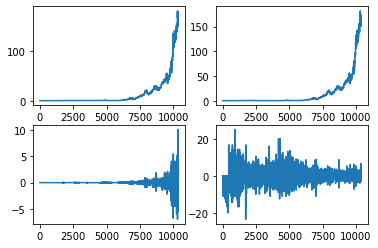

In [99]:
plt.subplot(2,2,1)
plt.plot(_df["Open"])
plt.subplot(2,2,2)
plt.plot(_df["Close"])
plt.subplot(2,2,3)
plt.plot(_df["등락폭"])
plt.subplot(2,2,4)
plt.plot(_df["등락율"])
plt.show()